In [14]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns


Wczytanie danych

In [3]:
creditScore_df = pd.read_csv('credit_score.csv')
creditScore_df.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [4]:
#przyjrzyjmy sie blizej danym
creditScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [7]:
# usuwamy ewenetualne kolumny z NaN
threshold = creditScore_df.shape[0] * 0.7  #rozmiar*70% -> jak cos ma wicej niz 70% None to usuniemy kolumne
credit_df_drop = creditScore_df.loc[:, creditScore_df.apply(lambda x: x.isna().sum(), axis=0) < threshold]
credit_df_drop.head(10)


,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0
5,C04Q46QKOG,181636,339055,1695274,1.8667,9.3334,5.0000,11446,1910,0.1669,...,0.3571,0.0714,No,1,0,0,1,0,596,0
6,C069MLDS7X,60881,42617,383550,0.7000,6.3000,8.9999,2658,117,0.0440,...,1.4286,0.1587,No,1,0,0,1,0,580,0
7,C07VC05Z4R,220838,186863,2225362,0.8462,10.0769,11.9091,4383,1272,0.2902,...,0.9091,0.0763,No,1,1,0,1,0,596,0
8,C0CLKGEG1L,78615,62892,110061,0.8000,1.4000,1.7500,5912,2346,0.3968,...,1.2500,0.7143,High,1,0,0,1,0,638,0
9,C0DYD1C2G1,174000,1502729,411273,8.6364,2.3636,0.2737,2831,812,0.2868,...,0.1053,0.3846,High,1,0,1,1,1,636,0


Widizmy, że żadna kolumna nie została usunięta, więc żadna nie zawierałą głównie wartości NaN

In [24]:
#usunmy kolumne "CUST_ID" jako, że ona nam nie pomoze w analizie danych
creditScore_df = creditScore_df.drop('CUST_ID', axis=1)
creditScore_df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.1163,0.0568,High,1,1,1,1,1,473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,...,0.2041,0.0543,High,1,1,1,1,1,418,0
996,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.8333,0.1087,No,1,0,0,1,0,589,1
997,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,0.2500,0.3448,No,1,0,0,1,0,499,0
998,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,5.0002,0.0662,No,1,1,0,1,0,507,0


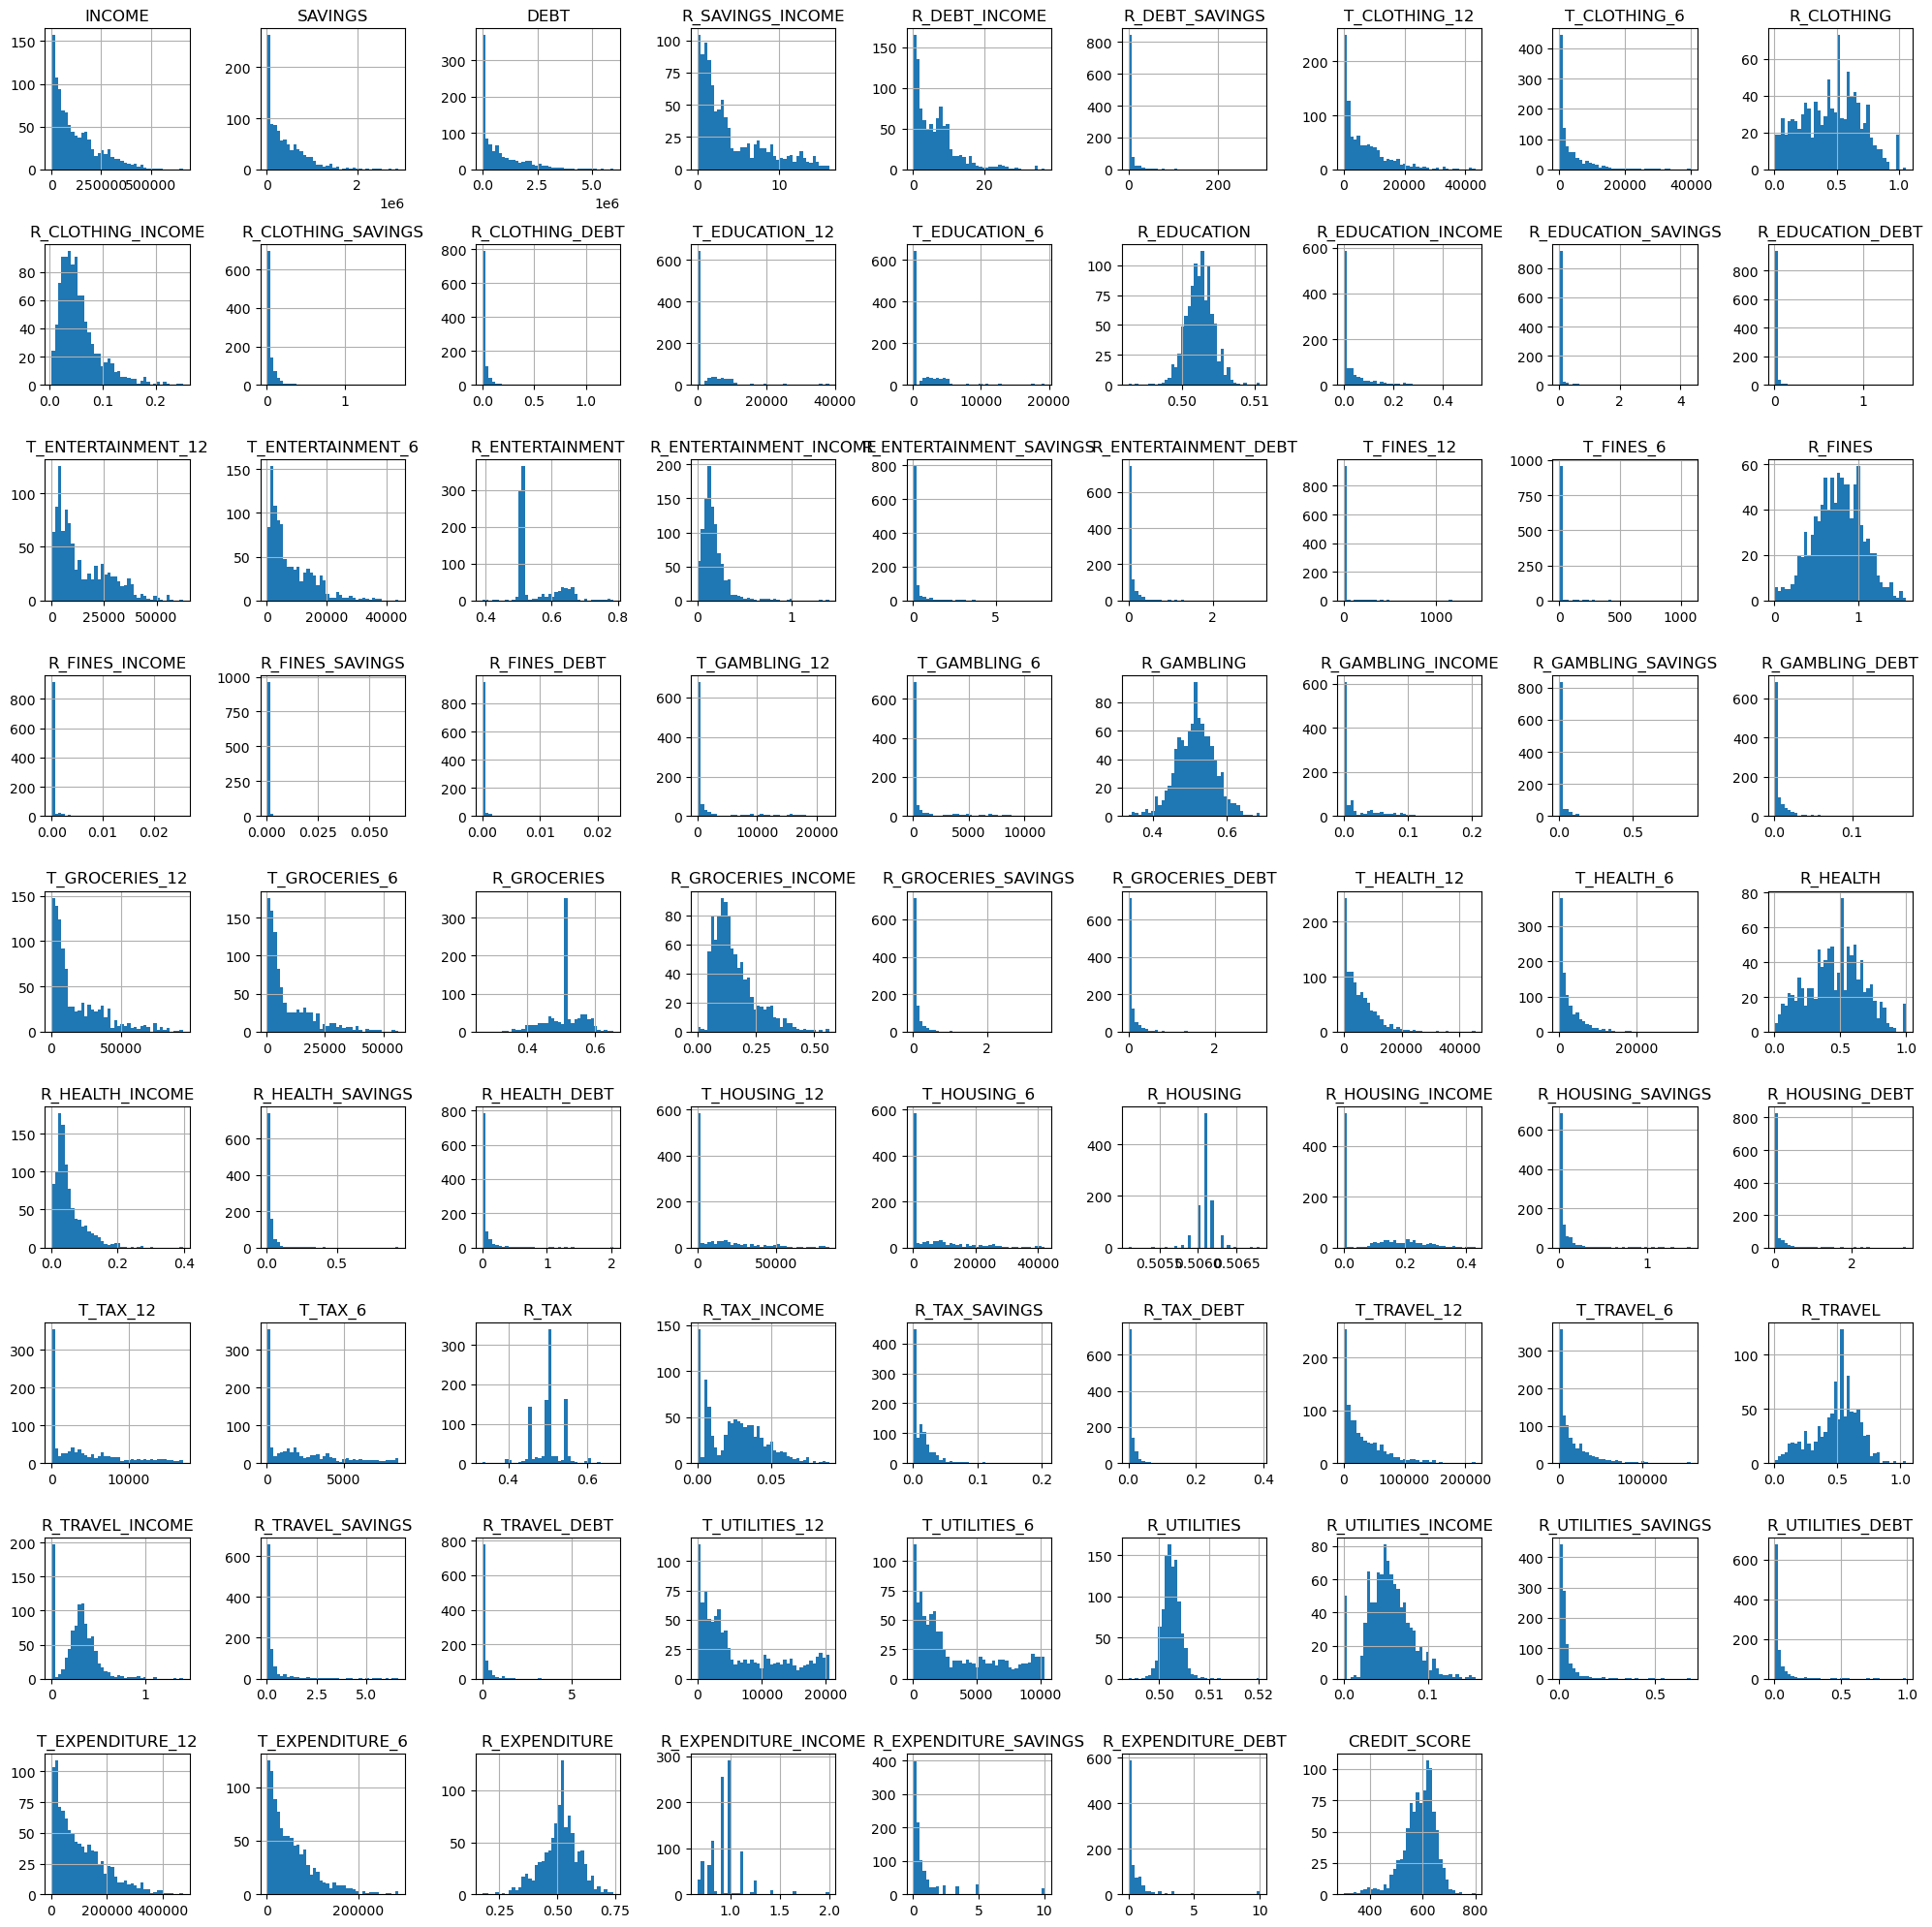

In [25]:
# zobaczmy rozklad wszystkich wartości, oprócz tych gdzie wartości są z przedziału tylko 0 lub 1
columns_to_plot = [col for col in creditScore_df.columns if not creditScore_df[col].nunique() in [1, 2]]

creditScore_df[columns_to_plot].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

Nie jest to zbyt czytelne.
Stwórzmy macierz korelacji aby zauważyć, jak najwięcej zależności. Skupimy się tu głównie na zależnościach pomiedzy zmiennymi "CREDIT_SCORE" oraz "DEFAULT" z pozostałymi

C:\Users\domin\AppData\Local\Temp\ipykernel_30580\4033798595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = creditScore_df.corr()


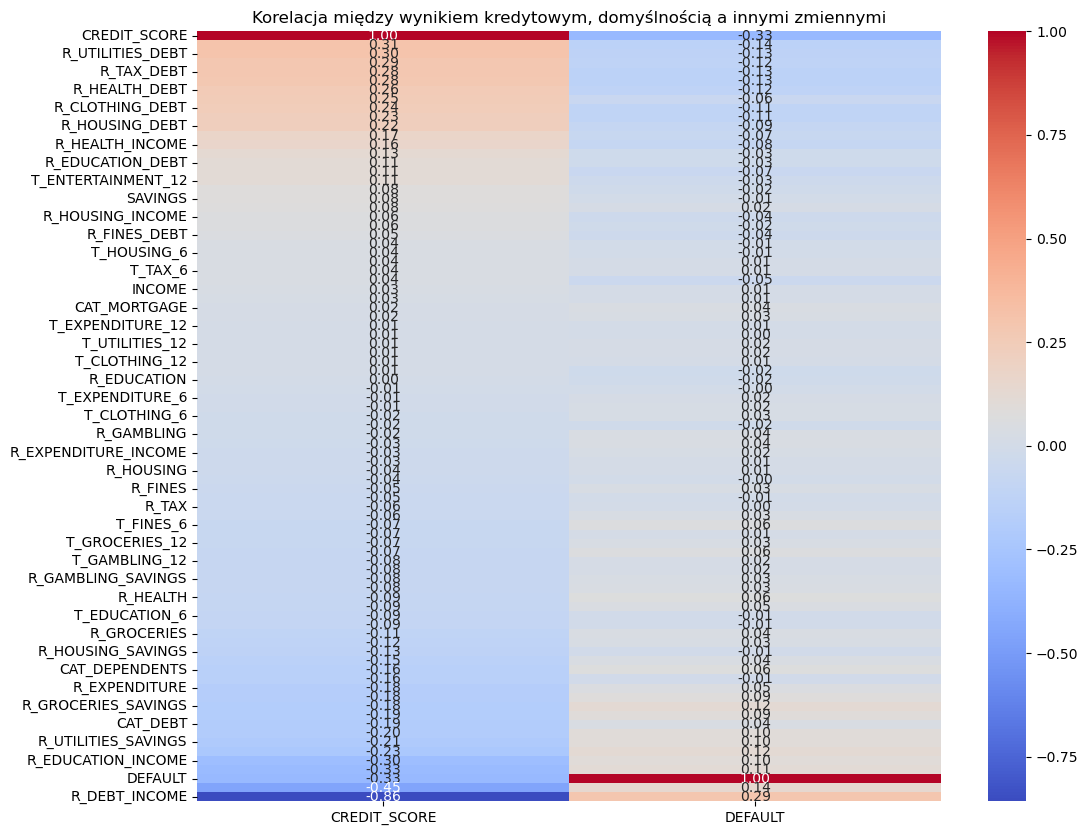

In [27]:
correlation_matrix = creditScore_df.corr()

# Wizualizacja macierzy korelacji z użyciem heatmapy
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['CREDIT_SCORE', 'DEFAULT']].sort_values(by='CREDIT_SCORE', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelacja między wynikiem kredytowym, domyślnością a innymi zmiennymi')
plt.show()

# Wyświetlenie korelacji
correlation_with_credit_score = correlation_matrix['CREDIT_SCORE'].sort_values(ascending=False)
correlation_with_default = correlation_matrix['DEFAULT'].sort_values(ascending=False)


Mozemy zaobserwowac nastepujące wnioski:
### a. dotyczące wyniku kredytowego
- najwyższą pozytywną korelację z wynikiem kredytowym wykazują zmienne odnoszące się do stosunku wydatków do długu, takie jak R_EXPENDITURE_DEBT, R_UTILITIES_DEBT, R_GROCERIES_DEBT, R_TAX_DEBT, i R_ENTERTAINMENT_DEBT. Oznacza to, że wyższy stosunek wydatków do długu jest związany z lepszym wynikiem kredytowym, co może sugerować, że osoby z wyższym wynikiem kredytowym lepiej zarządzają swoimi zobowiązaniami finansowymi

### b. dotyczące "default"
- R_DEBT_INCOME (stosunek długu do dochodu) ma najwyższą pozytywną korelację z domyślnością spośród przedstawionych zmiennych, co wskazuje, że wyższy stosunek długu do dochodu zwiększa ryzyko domyślności. To jest zgodne z intuicyjnym rozumieniem ryzyka kredytowego.
- inne zmienne, takie jak R_DEBT_SAVINGS (stosunek długu do oszczędności) i CAT_CREDIT_CARD (posiadanie karty kredytowej), również wykazują pozytywną korelację z domyślnością, sugerując, że te czynniki mogą przyczyniać się do zwiększonego ryzyka niewykonania zobowiązań finansowych.

IndexError: index 12 is out of bounds for axis 0 with size 12

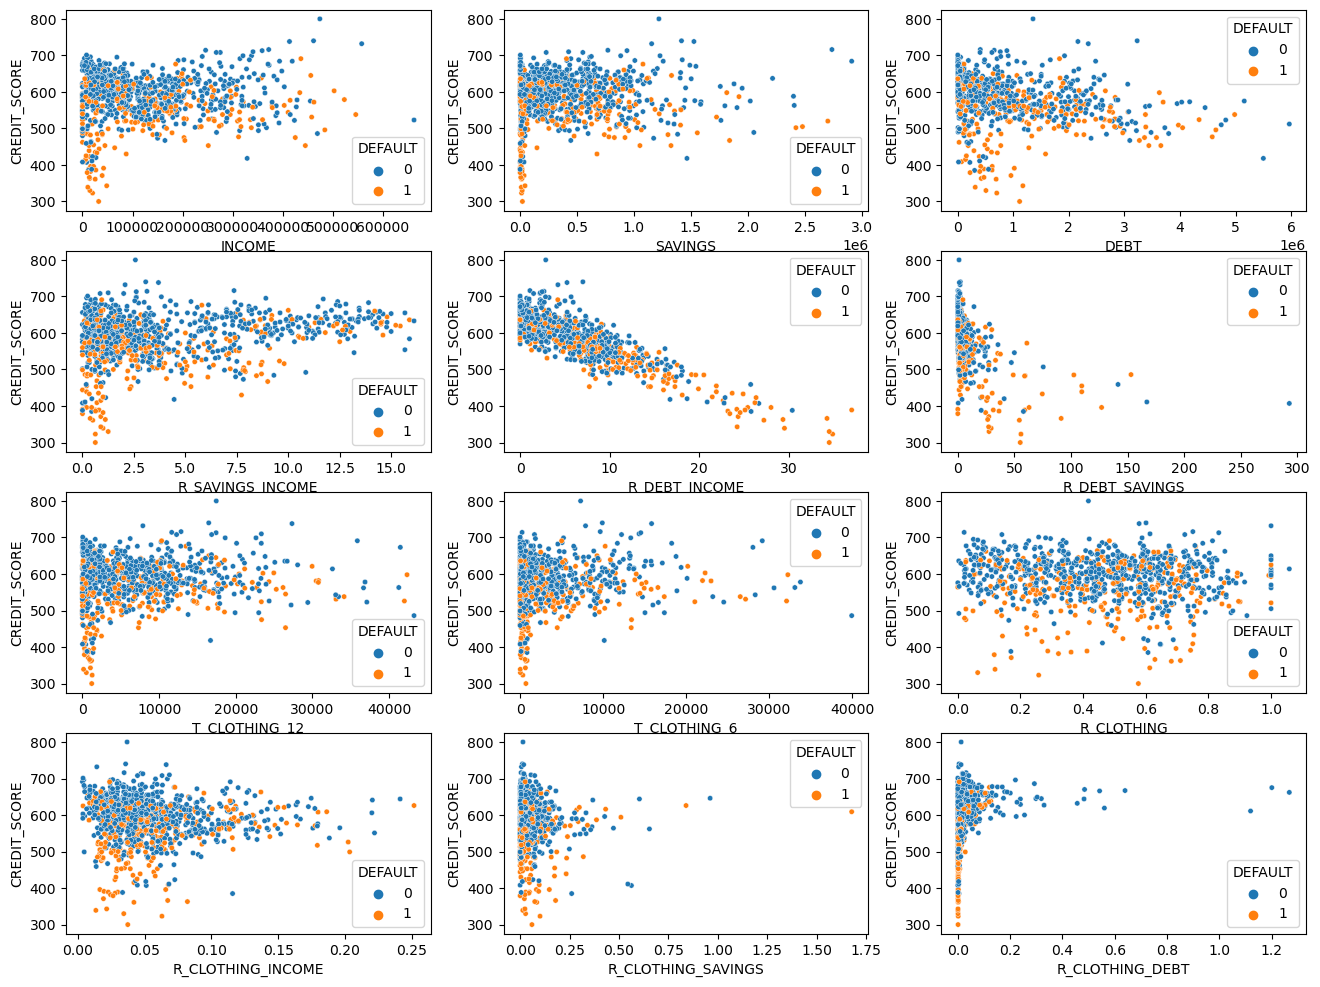

In [39]:
fig, axs = plt.subplots(4, 3, figsize=(16, 12))
axs = axs.flatten()
for i, col in enumerate(df_rearranged.columns[:-1]):
    sns.scatterplot(data=creditScore_df, x=col, y=df_rearranged[target_variable], ax=axs[i], s=15, hue='DEFAULT')
plt.suptitle("Target variable vs. features")
plt.tight_layout()